<a href="https://colab.research.google.com/github/taolaobd/CS114.L22.KHCL/blob/main/Assignments/Assignments4/Dudoaniemcuoiky2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Máy học - CS114.L22.KHCL 
#BÀI TẬP COLLAB SỐ 3: DỰ ĐOÁN ĐIỂM CUỐI KỲ THÔNG QUA WECODE

##Thành viên: 
1	Hồ Hải Thủy	19522323		

2	Nguyễn Khả Tiến	19522337		

3	Nguyễn Mạnh Toàn	19522363		

##Thông tin và mô tả dữ liệu:

**File wecode.csv gồm các thông tin:**

"id"            : id của lần nộp bài

"assignment_id" : id của assignment

"problem_id"    : id của problem

"user_id"       : id của user **cái này quan trọng nè**

"is_final"      : đây có phải là lần

"status"        : submission này đang dược chấm (PENDING), đã được chấm (SCORE) hay bị compilation-error

"pre_score"     : Số phần trăm test đúng, làm tròn đến 2 chữ số thập phân và nhân cho 100.

"coefficient"   : Hệ số nộp bài trễ

"file_name"     : không quan trọng

"language_id"   : language_id sẽ luôn là C++

"created_at"    : Thời điểm nộp bài

"updated_at"    : Thời điểm hệ thống cập nhật kết quả chấm cho bài nộp đó





**File score_training.csv gồm các thông tin**

id  : user id sẽ tương ứng với user id của file wecode.csv

QT  : Điểm quá trình

GK  : Điểm giữa kỳ

TH  : Điểm thực hành

CK  : Điểm cuối kỳ

TBM : Trung bình môn it001

TBTL: Trung bình tích lũy

##Tải dữ liệu

Tải dữ liệu về từ google drive bằng lệnh dưới

In [1]:
!gdown --id 1tfY89XVZZ2FlZyZVLZ1CGoJN3BC17qdA

Downloading...
From: https://drive.google.com/uc?id=1tfY89XVZZ2FlZyZVLZ1CGoJN3BC17qdA
To: /content/dudoandiem.zip
4.11MB [00:00, 65.1MB/s]


In [2]:
!unzip dudoandiem.zip

Archive:  dudoandiem.zip
   creating: dudoandiem/
  inflating: dudoandiem/score_training.csv  
  inflating: dudoandiem/wecode.csv   


File dữ liệu chúng ta gồm có 2 file trong đó:

*   score_training.csv file chứa cột CK tương ứng là label để train và cần dự đoán
*   wecode.csv file chứa các thông tin về quá trình làm Wecode mà ta cần trích xuất đặc trưng nhằm dự đoán các cột điểm CK còn thiếu



In [3]:
cd dudoandiem/

/content/dudoandiem


IMPORT THƯ VIỆN CẦN THIẾT:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
wecode_data = pd.read_csv('wecode.csv')

In [6]:
wecode_data.head(15)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [7]:
wecode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


Chuyển các cột updated_at và created_at về dạng dữ liệu thời gian:

In [8]:
wecode_data['updated_at']=pd.to_datetime(wecode_data['updated_at'])
wecode_data['created_at']=pd.to_datetime(wecode_data['created_at'])

In [9]:
wecode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             264606 non-null  int64         
 1   assignment_id  264606 non-null  int64         
 2   problem_id     264606 non-null  int64         
 3   user_id        264606 non-null  int64         
 4   is_final       264606 non-null  int64         
 5   status         264605 non-null  object        
 6   pre_score      264606 non-null  int64         
 7   coefficient    264606 non-null  object        
 8   file_name      264606 non-null  object        
 9   language_id    264606 non-null  int64         
 10  created_at     264606 non-null  datetime64[ns]
 11  updated_at     264606 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 24.2+ MB


Nhóm nhận thấy rằng cột cofficient đang ở dạng object nên sẽ chuyển về dạng số. Nhưng có 1 số hàng cột này sẽ hiển thị là 'error'. Nên nhóm quyết định sẽ cho những hàng này có cofficient=0 luôn để sau này có thể tính hệ số nộp trễ trung bình.  

In [10]:
wecode_data.loc[(wecode_data['coefficient'] == 'error') ,'coefficient']=0

In [11]:
wecode_data['coefficient']=pd.to_numeric(wecode_data['coefficient'])

In [12]:
wecode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             264606 non-null  int64         
 1   assignment_id  264606 non-null  int64         
 2   problem_id     264606 non-null  int64         
 3   user_id        264606 non-null  int64         
 4   is_final       264606 non-null  int64         
 5   status         264605 non-null  object        
 6   pre_score      264606 non-null  int64         
 7   coefficient    264606 non-null  int64         
 8   file_name      264606 non-null  object        
 9   language_id    264606 non-null  int64         
 10  created_at     264606 non-null  datetime64[ns]
 11  updated_at     264606 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 24.2+ MB


In [13]:
wecode_data.head(15)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


Lọc 1 số cột nhóm cho rằng là cần cho việc nghiên cứu:

In [14]:
df=wecode_data[['user_id','assignment_id','problem_id','coefficient','is_final','status','pre_score','created_at','updated_at']]

In [15]:
df.head(15)

,user_id,assignment_id,problem_id,coefficient,is_final,status,pre_score,created_at,updated_at
0,4,0,3,100,1,SCORE,10000,2020-10-30 10:58:11,2020-10-30 10:58:19
1,4,0,4,100,1,SCORE,10000,2020-10-30 11:07:09,2020-10-30 11:07:17
2,4,0,5,100,0,Compilation Error,0,2020-10-30 11:08:01,2020-10-30 11:23:36
3,4,0,5,100,0,Compilation Error,0,2020-10-30 11:11:41,2020-10-30 11:11:42
4,4,0,5,100,0,Compilation Error,0,2020-10-30 11:15:06,2020-10-30 11:15:07
5,4,0,5,100,0,Compilation Error,0,2020-10-30 11:16:57,2020-10-30 11:16:58
6,4,0,6,100,1,SCORE,10000,2020-10-30 11:18:47,2020-10-30 11:18:55
7,4,0,7,100,1,SCORE,10000,2020-10-30 11:20:07,2020-10-30 11:20:15
8,4,0,8,100,1,SCORE,10000,2020-10-30 11:21:02,2020-10-30 11:21:10
9,4,0,9,100,1,SCORE,10000,2020-10-30 11:21:36,2020-10-30 11:21:44


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        264606 non-null  int64         
 1   assignment_id  264606 non-null  int64         
 2   problem_id     264606 non-null  int64         
 3   coefficient    264606 non-null  int64         
 4   is_final       264606 non-null  int64         
 5   status         264605 non-null  object        
 6   pre_score      264606 non-null  int64         
 7   created_at     264606 non-null  datetime64[ns]
 8   updated_at     264606 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 18.2+ MB


Add thêm cột: liệu sinh viên đã solved 1 problem hay là chưa ?

Nếu đã solved: 1

Nếu chưa solved: 0

In [17]:
df.loc[(df['is_final'] == 1) & (df['status'] == 'SCORE'),'solved']=1
df.loc[(df['is_final'] != 1) | (df['status'] != 'SCORE'),'solved']=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

##Tính 1 số cột rút ra từ file wecode:

Dùng sqlite để truy vấn:

Có tham khảo syntax tại: https://www.sqlitetutorial.net/

In [18]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [19]:
df.to_sql('user',con=engine)

Bọn em lọc ra một số thông tin dựa trên data wecode mà bọn em nghĩ là sẽ quan trọng cho việc tạo feature bằng phần code dưới đây

In [20]:
#user id
l0=engine.execute("SELECT user_id FROM user GROUP BY user_id").fetchall()
l0=[i[0] for i in l0]
#tổng số problem đã solved:
l1=engine.execute("SELECT sum(solved) FROM user GROUP BY user_id").fetchall()
l1=[int(i[0]) for i in l1]

#tổng số problem đã submit
l2=engine.execute("SELECT count(DISTINCT problem_id) FROM user GROUP BY user_id").fetchall()
l2=[int(i[0]) for i in l2]

#Tổng số submit của mỗi sinh viên:
l3=engine.execute("SELECT count(*) FROM user GROUP BY user_id").fetchall()
l3=[int(i[0]) for i in l3]

#Hệ số nộp bài trễ trung bình:
l4=engine.execute("SELECT AVG(coefficient) FROM user  GROUP BY user_id").fetchall()
l4=[int(i[0]) for i in l4]

#Tổng điểm pre_score có is_final =1
l5=engine.execute("SELECT sum(pre_score) FROM user WHERE is_final=1 GROUP BY user_id").fetchall()
l5=[int(i[0]) for i in l5]

#Số lần nộp đúng của sinh viên:
l6=engine.execute("SELECT count(*) FROM user WHERE status='SCORE' GROUP BY user_id").fetchall()
l6=[int(i[0]) for i in l6]

###Tính thời gian submit trung bình của sinh viên (thời điểm submit cuối cùng - thời điểm submit đầu tiên) (us):

thời gian submit trung bình của 1 sinh viên đối với 1 problem:



GROUP BY USER_ID VÀ PROBLEM_ID

In [21]:
import numpy as np
from datetime import datetime

In [22]:
t0=engine.execute("SELECT user_id FROM user GROUP BY user_id,problem_id").fetchall()
t0=[i[0] for i in t0]

In [23]:
t1=engine.execute("SELECT problem_id FROM user GROUP BY user_id,problem_id").fetchall()
t1=[i[0] for i in t1]

In [24]:
#thời gian submit đầu tiên của mỗi problem
l_t0=engine.execute("SELECT MIN(created_at) FROM user  GROUP BY user_id,problem_id").fetchall()
t_1st_created=np.array([i[0] for i in l_t0],dtype='datetime64')
len(t_1st_created)

97190

In [25]:
#thời gian submit cuối cùng của mỗi problem
l_t1=engine.execute("SELECT MAX(created_at) FROM user  GROUP BY user_id,problem_id").fetchall()
t_finall_created=np.array([i[0] for i in l_t1],dtype='datetime64')
len(t_finall_created)

97190

Thời gian submit trung bình 1 problem: đơn vị là us

In [26]:
time_to_solve=t_finall_created-t_1st_created

In [27]:
time_to_solve=list(time_to_solve.astype('int64'))

In [28]:
df_time = pd.DataFrame(list(zip(t0,t1,time_to_solve)),
               columns =['user_id','problem_id', 'time_to_solve_a_problem'])
df_time.head(15)

,user_id,problem_id,time_to_solve_a_problem
0,1,81,0
1,1,370,0
2,4,3,0
3,4,4,0
4,4,5,927000000
5,4,6,0
6,4,7,0
7,4,8,0
8,4,9,0
9,4,81,0


In [29]:
#dùng sql để truy vấn:
engine_time = create_engine('sqlite://', echo=False)
df_time.to_sql('user_time',con=engine_time)

Tính thời gian submit trung bình của mỗi sinh viên




In [30]:
time_1=engine_time.execute("SELECT AVG(time_to_solve_a_problem) FROM user_time  GROUP BY user_id").fetchall()
time_1=[i[0] for i in time_1]

In [31]:
df_main = pd.DataFrame(list(zip(l0,l1, l2,l3,l4,l5,l6,time_1)),
               columns =['user_id','problem_solved', 'problem_tries','submit_count','AVeraGe_coefficient','Total_score_final','submit_fullscore_count','average_time_to_solve'])
df_main.head(15)

,user_id,problem_solved,problem_tries,submit_count,AVeraGe_coefficient,Total_score_final,submit_fullscore_count,average_time_to_solve
0,1,1,2,2,100,10000,1,0.000000e+00
1,4,38,41,54,100,370000,48,9.524390e+07
2,5,4,5,6,100,30000,4,9.000000e+06
3,6,86,88,130,100,850000,105,6.312216e+09
4,7,2,2,5,100,9209,5,1.135000e+09
5,11,12,18,50,100,100316,43,1.871594e+10
6,14,7,7,22,100,68000,20,3.848571e+08
7,15,48,50,101,100,458666,76,2.725648e+10
8,20,12,12,13,100,120000,12,6.833333e+07
9,24,76,78,164,100,750299,131,1.471526e+09


In [32]:
#số problem đã solved/ problem đã submit:
df_main['problem_solved_per_tries'] = df_main['problem_solved'] / df_main['problem_tries']

In [33]:
#Tổng số problem đã sumbit / Tổng số submissions 
df_main['problem_tries_per_submit_count'] = 1 / (df_main['problem_tries'] / df_main['submit_count'])

In [34]:
#Số lần nộp đúng/ Tổng số submissions:
df_main['submit_fullsore_per_Total_submits'] = df_main['submit_fullscore_count'] / df_main['submit_count']

In [35]:
df_main.head(15)

,user_id,problem_solved,problem_tries,submit_count,AVeraGe_coefficient,Total_score_final,submit_fullscore_count,average_time_to_solve,problem_solved_per_tries,problem_tries_per_submit_count,submit_fullsore_per_Total_submits
0,1,1,2,2,100,10000,1,0.000000e+00,0.500000,1.000000,0.500000
1,4,38,41,54,100,370000,48,9.524390e+07,0.926829,1.317073,0.888889
2,5,4,5,6,100,30000,4,9.000000e+06,0.800000,1.200000,0.666667
3,6,86,88,130,100,850000,105,6.312216e+09,0.977273,1.477273,0.807692
4,7,2,2,5,100,9209,5,1.135000e+09,1.000000,2.500000,1.000000
5,11,12,18,50,100,100316,43,1.871594e+10,0.666667,2.777778,0.860000
6,14,7,7,22,100,68000,20,3.848571e+08,1.000000,3.142857,0.909091
7,15,48,50,101,100,458666,76,2.725648e+10,0.960000,2.020000,0.752475
8,20,12,12,13,100,120000,12,6.833333e+07,1.000000,1.083333,0.923077
9,24,76,78,164,100,750299,131,1.471526e+09,0.974359,2.102564,0.798780


In [36]:
score = pd.read_csv('score_training.csv')

In [37]:
score_data = score[['id','CK']]

Đổi tên cột id :

In [38]:
# Đổi tên cột cho trùng với id bên wecode
score_data=score_data.rename(columns={'id':'user_id'},inplace=False)

In [39]:
score_data.head(15)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
5,30,9
6,34,6.5
7,35,4.5
8,36,7
9,37,7.5


Merge wecode và CK lại với nhau:

In [40]:
data_final = pd.merge(df_main,score_data,on='user_id',how='outer')

In [41]:
data_final.head(15)

,user_id,problem_solved,problem_tries,submit_count,AVeraGe_coefficient,Total_score_final,submit_fullscore_count,average_time_to_solve,problem_solved_per_tries,problem_tries_per_submit_count,submit_fullsore_per_Total_submits,CK
0,1,1.0,2.0,2.0,100.0,10000.0,1.0,0.000000e+00,0.500000,1.000000,0.500000,NaN
1,4,38.0,41.0,54.0,100.0,370000.0,48.0,9.524390e+07,0.926829,1.317073,0.888889,NaN
2,5,4.0,5.0,6.0,100.0,30000.0,4.0,9.000000e+06,0.800000,1.200000,0.666667,NaN
3,6,86.0,88.0,130.0,100.0,850000.0,105.0,6.312216e+09,0.977273,1.477273,0.807692,NaN
4,7,2.0,2.0,5.0,100.0,9209.0,5.0,1.135000e+09,1.000000,2.500000,1.000000,NaN
5,11,12.0,18.0,50.0,100.0,100316.0,43.0,1.871594e+10,0.666667,2.777778,0.860000,NaN
6,14,7.0,7.0,22.0,100.0,68000.0,20.0,3.848571e+08,1.000000,3.142857,0.909091,NaN
7,15,48.0,50.0,101.0,100.0,458666.0,76.0,2.725648e+10,0.960000,2.020000,0.752475,NaN
8,20,12.0,12.0,13.0,100.0,120000.0,12.0,6.833333e+07,1.000000,1.083333,0.923077,NaN
9,24,76.0,78.0,164.0,100.0,750299.0,131.0,1.471526e+09,0.974359,2.102564,0.798780,9.5


In [42]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            1279 non-null   int64  
 1   problem_solved                     1155 non-null   float64
 2   problem_tries                      1155 non-null   float64
 3   submit_count                       1155 non-null   float64
 4   AVeraGe_coefficient                1155 non-null   float64
 5   Total_score_final                  1155 non-null   float64
 6   submit_fullscore_count             1155 non-null   float64
 7   average_time_to_solve              1155 non-null   float64
 8   problem_solved_per_tries           1155 non-null   float64
 9   problem_tries_per_submit_count     1155 non-null   float64
 10  submit_fullsore_per_Total_submits  1155 non-null   float64
 11  CK                                 974 non-null    objec

In [43]:
# Loại bỏ những dòng có giá trị NA và sắp xếp điểm Ck tăng dần
data_finally = data_final.dropna().sort_values(by = 'CK')
data_finally.head(15)

,user_id,problem_solved,problem_tries,submit_count,AVeraGe_coefficient,Total_score_final,submit_fullscore_count,average_time_to_solve,problem_solved_per_tries,problem_tries_per_submit_count,submit_fullsore_per_Total_submits,CK
37,76,28.0,29.0,58.0,100.0,280000.0,45.0,1.048024e+10,0.965517,2.000000,0.775862,0
704,1215,56.0,62.0,109.0,99.0,550000.0,269.0,1.006887e+09,0.903226,1.758065,2.467890,0
78,161,41.0,44.0,68.0,100.0,410000.0,52.0,1.432091e+09,0.931818,1.545455,0.764706,0
906,1529,18.0,18.0,41.0,100.0,173777.0,125.0,1.086372e+10,1.000000,2.277778,3.048780,0
690,1193,16.0,22.0,49.0,100.0,103545.0,134.0,2.121695e+10,0.727273,2.227273,2.734694,0
892,1505,7.0,8.0,8.0,100.0,70000.0,328.0,0.000000e+00,0.875000,1.000000,41.000000,0
552,941,74.0,77.0,147.0,100.0,681173.0,69.0,1.712519e+09,0.961039,1.909091,0.469388,0
316,562,31.0,30.0,92.0,100.0,294000.0,559.0,2.055527e+10,1.033333,3.066667,6.076087,0
969,1619,109.0,113.0,288.0,100.0,1080200.0,74.0,8.173998e+10,0.964602,2.548673,0.256944,0
82,166,23.0,28.0,32.0,100.0,227000.0,24.0,2.157143e+07,0.821429,1.142857,0.750000,0


## **Vẽ đồ thị**

Text(0.5, 1.0, 'x:Số problem giải được  \n y:điểm CK')

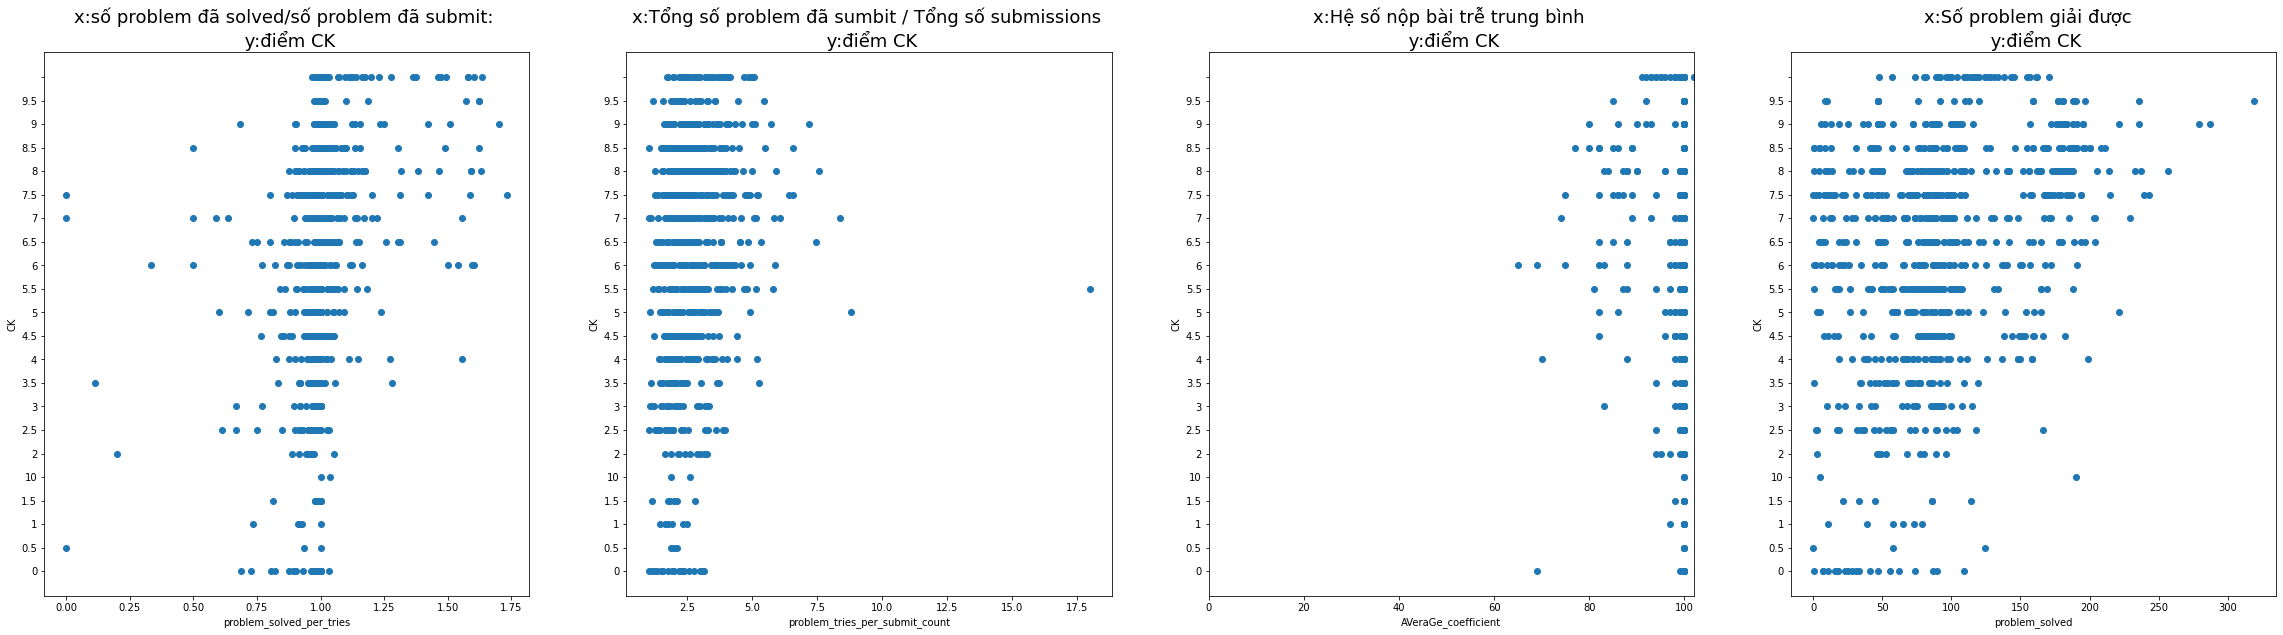

In [44]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize = (40, 10))

ax1.scatter(data_finally['problem_solved_per_tries'].values, data_finally['CK'].values)
ax1.set(xlabel = 'problem_solved_per_tries', ylabel = 'CK')
ax1.set_title('x:số problem đã solved/số problem đã submit: \n y:điểm CK',fontsize=18)


ax2.scatter(data_finally['problem_tries_per_submit_count'].values, data_finally['CK'].values)
ax2.set(xlabel = 'problem_tries_per_submit_count', ylabel = 'CK')
ax2.set_title('x:Tổng số problem đã sumbit / Tổng số submissions \n y:điểm CK',fontsize=18)

ax3.scatter(data_finally['AVeraGe_coefficient'].values, data_finally['CK'].values)
ax3.set(xlabel = 'AVeraGe_coefficient', ylabel = 'CK')
ax3.set_title('x:Hệ số nộp bài trễ trung bình \n y:điểm CK',fontsize=18)
ax3.set_xlim(0,102)

ax4.scatter(data_finally['problem_solved'].values, data_finally['CK'].values)
ax4.set(xlabel = 'problem_solved', ylabel = 'CK')
ax4.set_title('x:Số problem giải được  \n y:điểm CK',fontsize=18)

**Nhận xét:**

- Hình 1: Ta thấy số problem đã solved/số problem đã submit có những bạn sinh viên lớn hơn 1. Điều này chứng tỏ sau khi đã hoàn thành problem đó bạn sinh viên vẫn luyện tập thêm, tìm cách giải tối ưu hơn cho problem. Và những bạn có tỷ lệ này cao thì điểm cuối kỳ cũng cao hơn những bạn chỉ nộp để hoàn thành problem.
Những bạn giải được từ 150 problems trở lên đa số không có bạn nào dưới 4 điểm.
- Hình 2: Không thể hiện được gì nhiều, bởi vì Tổng số submissions / tổng số problem đã submit tức là số lần submit cho mỗi problem. Đây là một con số không thực tế, bởi vì độ khó là bài toán là khác nhau nên trung bình của nó là không đúng.
- Hình 3: Ta thấy những sinh viên nộp bài càng sớm thì đa phần điểm ck càng cao. Như trong đồ thị thì sinh viên có hệ số nộp bài trễ dưới 90 thường là điểm từ 5đ trở lên.
- Hình 4: Nhìn đồ thị có thể thấy sinh viên giải được càng nhiều bài thì điểm cuối kỳ càng cao, điển hình là những sinh viên giải từ 150 bài trở lên có điểm cuối kỳ từ 4.5đ trở lên. Những sinh viên có điểm dưới 5 thì thường nằm trong khoảng từ 0-150 bài. 

Nhận xét:

Những bạn nộp từ khoảng 250 lần submit trở lên thì hầu như không có bạn nào dưới 4 điểm

Những bạn có Tổng score từ 150*1000000 trở lên thì cũng đồng thời không có bạn nào dưới 4 điểm

Text(0.5, 1.0, 'x:Số lần sinh viên nộp đúng \n y:điểm CK')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


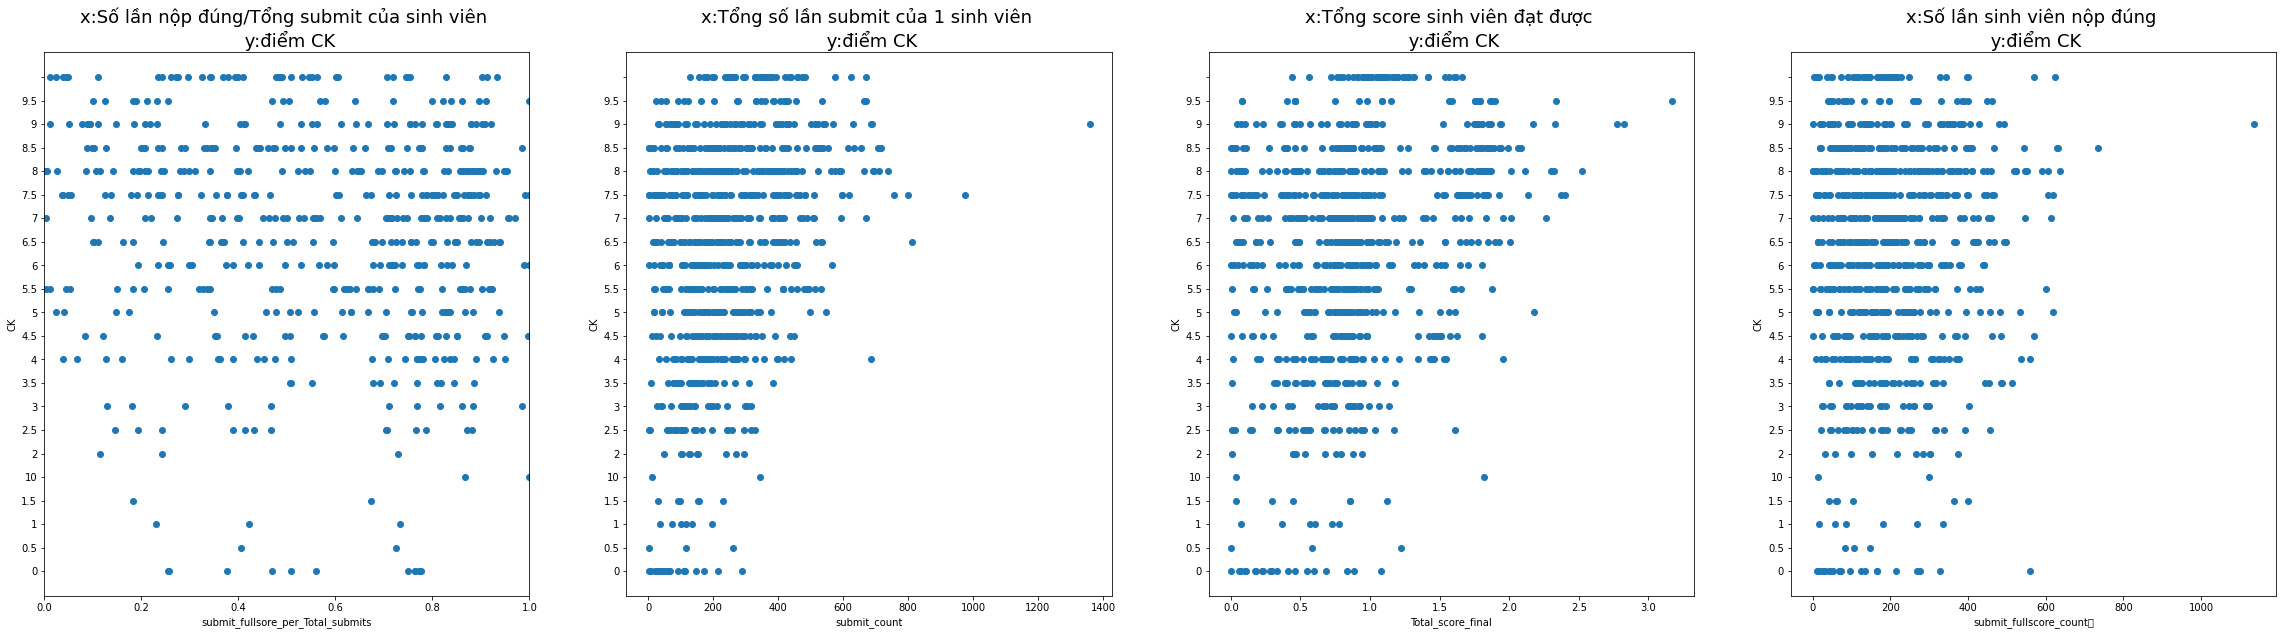

In [45]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize = (40, 10))

ax1.scatter(data_finally['submit_fullsore_per_Total_submits'].values, data_finally['CK'].values)
ax1.set(xlabel = 'submit_fullsore_per_Total_submits', ylabel = 'CK')
ax1.set_xlim(0,1)
ax1.set_title('x:Số lần nộp đúng/Tổng submit của sinh viên \n y:điểm CK',fontsize=18)

ax2.scatter(data_finally['submit_count'].values, data_finally['CK'].values)
ax2.set(xlabel = 'submit_count', ylabel = 'CK')
ax2.set_title('x:Tổng số lần submit của 1 sinh viên \n y:điểm CK',fontsize=18)

ax3.scatter(data_finally['Total_score_final'].values/1000000, data_finally['CK'].values)
ax3.set(xlabel = 'Total_score_final', ylabel = 'CK')
ax3.set_title('x:Tổng score sinh viên đạt được \n y:điểm CK',fontsize=18)

ax4.scatter(data_finally['submit_fullscore_count'].values, data_finally['CK'].values)
ax4.set(xlabel = 'submit_fullscore_count	', ylabel = 'CK')
ax4.set_title('x:Số lần sinh viên nộp đúng \n y:điểm CK',fontsize=18)

**Nhận xét:**

- Hình 1: Bảng này biểu thị trung bình số lần nộp đúng của sinh viên
- Hình 2: Ta thấy sinh viên điểm dưới 5đ, đều là những sinh viên có số lần submit ít(400 trờ lại). Điều này cho thấy những sinh viên thấp điểm là những sinh viên lười, ít làm bài.
- Hình 3: Ta thấy những sinh viên có tổng score đạt được càng cao thì điểm ck càng cao và những sinh viên điểm thấp(dưới 5) có tổng score này thấp. Cụ thể trong hình ta thấy những sinh viên có tổng score từ 1.5 trở lên đa phần có điểm cuối kỳ từ 5 trở lên và điểm cuối kỳ tăng dần theo tổng score. Còn những sinh viên có điểm cuối kỳ từ 5 trở xuống có tổng score dưới 1.5 
- Hình 4:  

Nhận xét: 

Những bạn nộp từ khoảng 250 lần submit trở lên thì hầu như không có bạn nào dưới 4 điểm

Những bạn có Tổng score từ 150*1000000 trở lên thì cũng đồng thời không có bạn nào dưới 4 điểm

Text(0.5, 1.0, 'x:Thời gian submit trung bình(us) \n y:điểm CK')

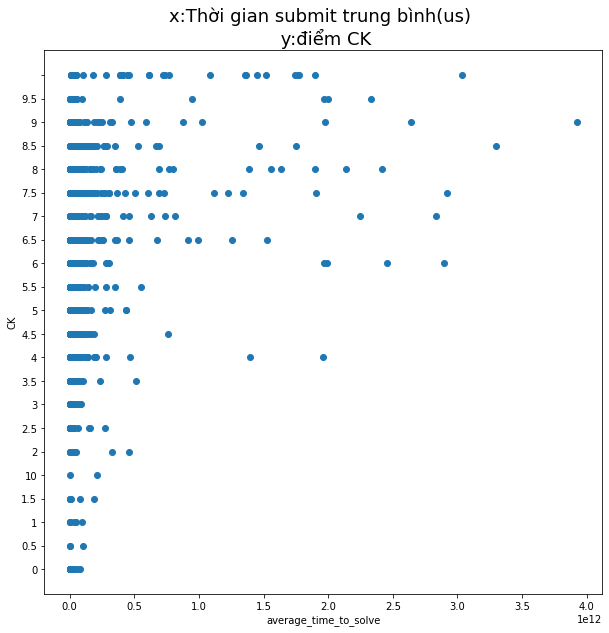

In [46]:
fig, (ax1) = plt.subplots(1, 1, figsize = (10, 10))

ax1.scatter(data_finally['average_time_to_solve'].values, data_finally['CK'].values)
ax1.set(xlabel = 'average_time_to_solve', ylabel = 'CK')
ax1.set_title('x:Thời gian submit trung bình(us) \n y:điểm CK',fontsize=18)

**Nhận xét:**
- Nhìn đồ thị ta thấy rõ ràng điểm thi cuối kỳ tăng dần theo thời gian submid trung bình (tính từ 0.5). Điều này cho thấy sinh viên giải 1 problem có thời gian lớn, thì thường có điểm cao bởi vì bạn này đầu tư nhiều thời gian để luyện tập và làm. Bởi vì, trong thực tế, một sinh viên giải nhanh, thì chỉ có thể là rất giỏi hoặc chép bài, nhưng những bạn rất giỏi thì có xác suất thấp, ít. Nên ta có thể sử dụng hệ số này để tìm những bạn giỏi với thời gian làm bài lớn.